In [1]:
import os
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
def temp_plot(n):
    file = os.path.join(f"temp_files/temp_{n}h2o.dat")
    temp =[]
    with open(file, 'r') as file:
        data= file.readlines()
        for indx,line in enumerate(data):
            temp.append(float(str(line.split()[4])))
    plt.figure(figsize=(8, 5))
    plt.plot(temp)
    plt.title(f"Change of temperature in thermalization step for system with {n} of water molecules")
    plt.xlabel("Number of steps")
    plt.ylabel("Temperature (K)")

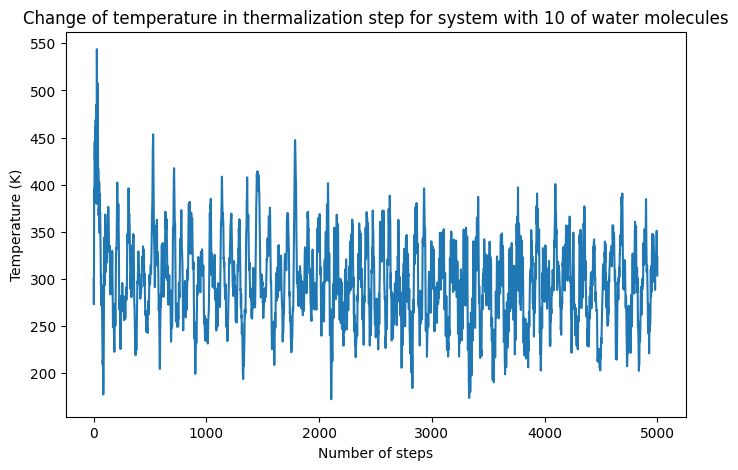

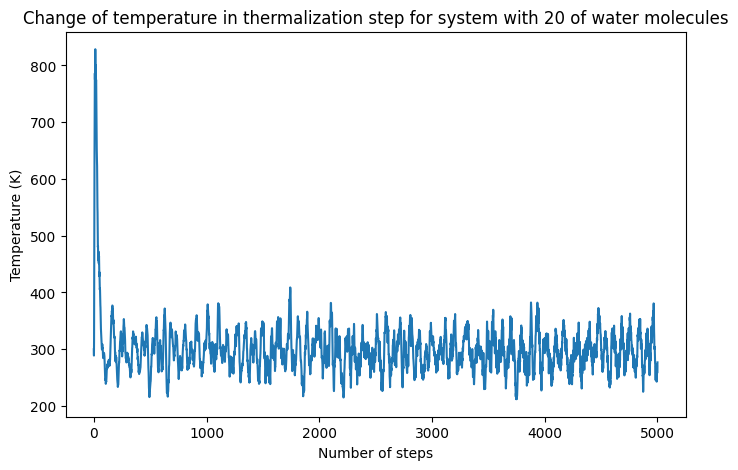

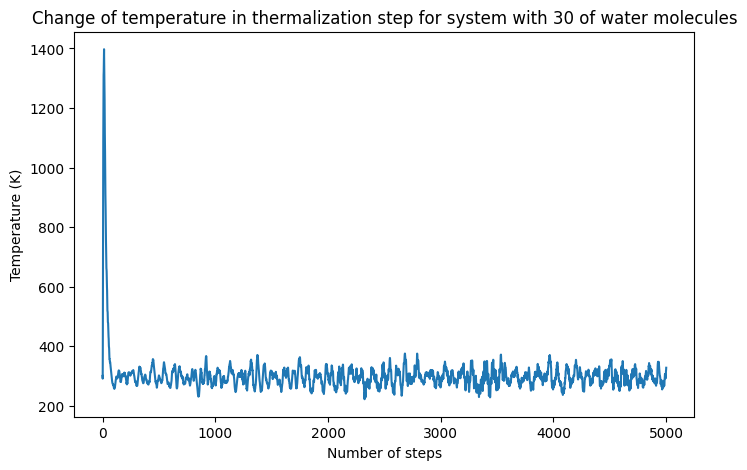

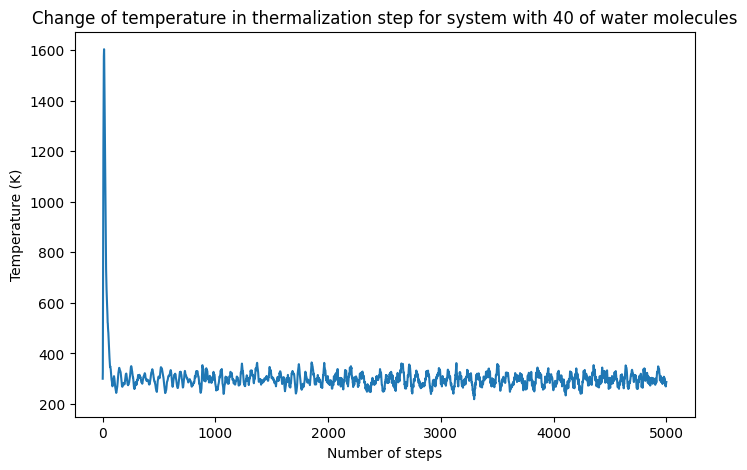

In [3]:
for i in range(1, 5):
    temp_plot(i*10)

In [130]:
def extract_md(n):
    md_step = []
    pot_energy = []
    kin_energy =[]
    tot_energy = []
    md_temp =[]
    md_path = os.path.join(f"therm1_out/md_{n}.out")
    with open(md_path, 'r') as md_out:
        data= md_out.readlines()
        for indx,line in enumerate(data):
            text = line.split(':')
            #print(text)
            if 'MD step' in text:
                md_step.append(int(text[1]))
            if 'Potential Energy' in text:
                pot_energy.append(float(text[1].split()[0]))
            if 'MD Kinetic Energy' in text:
                kin_energy.append(float(text[1].split()[0]))
            if 'Total MD Energy' in text:
                tot_energy.append(float(text[1].split()[0]))
            if 'MD Temperature' in text:
                md_temp.append(float(text[1].split()[2]))
    return md_step, pot_energy, kin_energy, tot_energy, md_temp
                
            
            
    

In [131]:
def md_analysis(n, start, end):
    nmovingatoms = (3*n)+2
    step, pot, kin, tot, temp =extract_md(n)
    st=int(start/10)
    en= int((end+10)/10)
    
    pmean = np.mean(pot[st:en])
    pstd = np.std(pot[st:en])
    
    kmean = np.mean(kin[st:en])
    kstd = np.std(kin[st:en])
    
    tmean = np.mean(tot[st:en])
    tstd = np.std(tot[st:en])

    print('temperature from mean kinetic energy          = ',kmean*2*315777/(nmovingatoms*3),'K')
    print('thermal fluctuations of the total energy       = ',1*100/np.sqrt(3*nmovingatoms),'%')
    print('total energy fluctuations compared to 3N*KT   = ',tstd*100/(kmean*2),'%')
    print('kinetic energy fluctuations compared to 3N*KT = ',kstd*100/(kmean*2),'%')

    plt.figure(figsize=(8, 5))
    plt.plot(step[st:en], temp[st:en])
    plt.title(f"Temperature fluctuation in thermalization {start} - {end}  for system with {n} of water molecules")
    plt.xlabel("Number of steps")
    plt.ylabel("Temperature (K)")

    plt.figure(figsize=(8, 5))
    plt.plot(step[st:en], pot[st:en])
    plt.title(f"Potential Energy fluctuation in thermalization {start} - {end}  for system with {n} of water molecules")
    plt.xlabel("Number of steps")
    plt.ylabel("Potential Energy (eV)")

    plt.figure(figsize=(8, 5))
    plt.plot(step[st:en], kin[st:en])
    plt.title(f"Kinetic Energy fluctuation in thermalization {start} - {end}  for system with {n} of water molecules")
    plt.xlabel("Number of steps")
    plt.ylabel("Kinetic Energy (eV)")

    plt.figure(figsize=(8, 5))
    plt.plot(step[st:en], tot[st:en])
    plt.title(f"Total Energy fluctuation in thermalization {start} - {end}  for system with {n} of water molecules")
    plt.xlabel("Number of steps")
    plt.ylabel("Total Energy (eV)")

    

temperature from mean kinetic energy          =  294.46059890968587 K
thermal fluctuations of the total energy       =  10.206207261596576 %
total energy fluctuations compared to 3N*KT   =  10.365334669319601 %
kinetic energy fluctuations compared to 3N*KT =  7.019592359741637 %


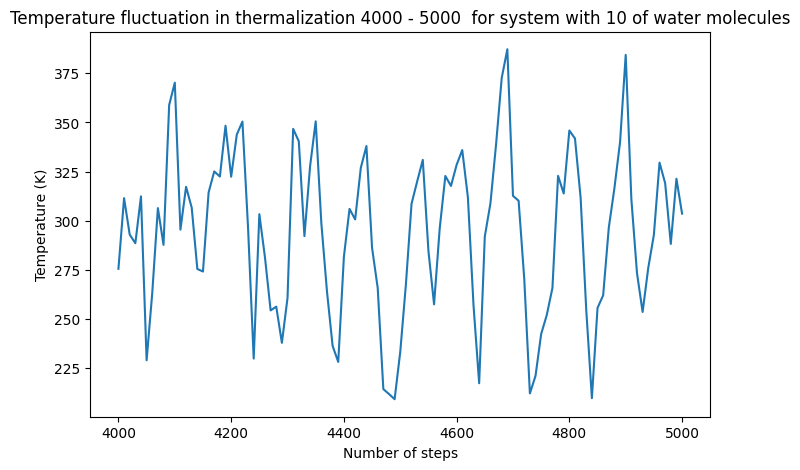

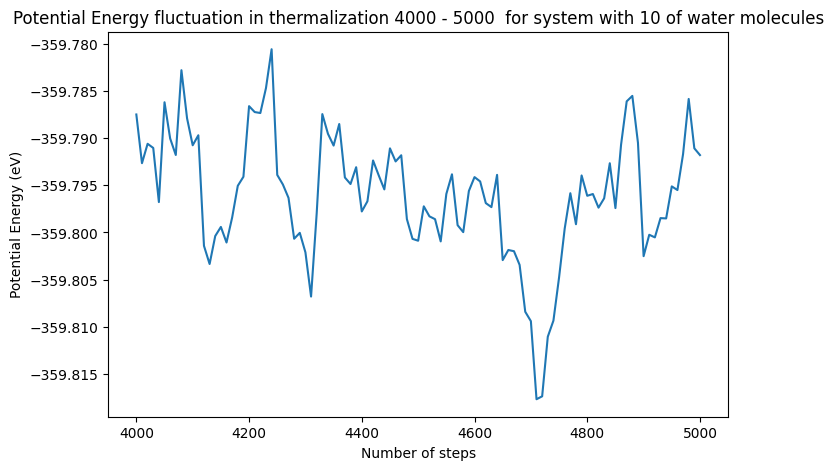

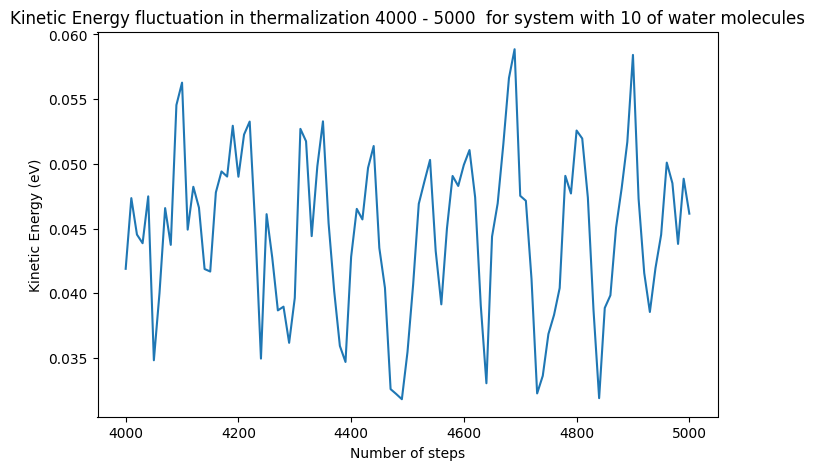

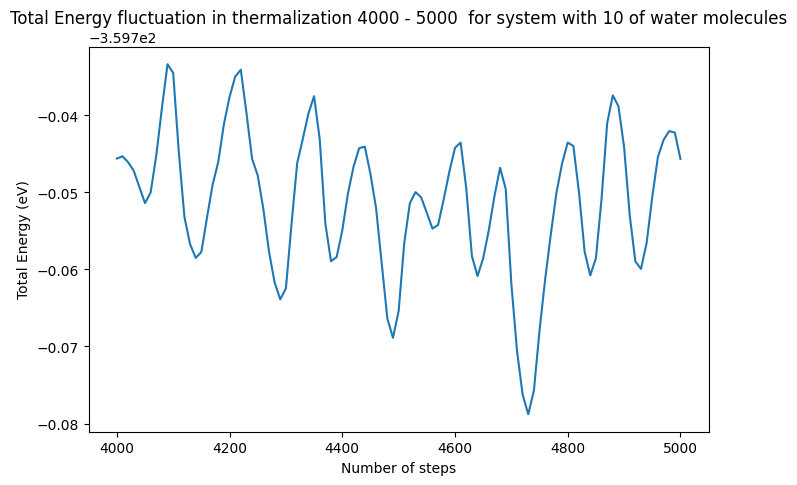

In [140]:
md_analysis(10,4000, 5000)